In [1]:
import xarray as xr
import csv
import pandas as pd
import numpy as np
import os
import pickle as pkl
import scipy.io as scipy
from datetime import datetime, date, timedelta
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc
import glob
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from numpy import trapz
import pickle
import numpy.matlib
from scipy.stats import sem
from FUNCTIONS_HYCOM import set_regions, set_regions_tags, find_timedelta64_index, \
create_composite, name_composite, below_above_MLD, plot_simple_pcolor, set_regions_offset, draw_box, \
save_3dvars_as_nc4, save_2dvars_as_nc4, save_1dvars_as_nc4, \
set_cmap, set_clim_plots, set_clim_plots_std, set_clim_plots_diff, set_clim_plots_std_diff, \
function_map_2D_hist, function_plots, function_single_panels_plots

import shutil
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap


SyntaxError: invalid syntax (<ipython-input-1-891c1cc6ff3e>, line 6)

In [2]:
# Define parameters
# define start and end years
start_year = 2011 # 2009
end_year = 2015 # 2018

max_depth_index_sel = 23

# 3 hourly time steps: 8 time steps per day
timesteps_before = 2*8 # 2 days prior
timesteps_after = 14*8 # 14 days after

len_time = len(np.arange(-timesteps_before,timesteps_after+1,1))

conversion_factor_3hourly = 3/24

days_from_event_center = 2

flag_save_to_Holte_matlab_code = False # True

offset_lon = 20

# Create datetime vector for plot (every 3 hours, from -7 to +7 days)
# time_plot = np.arange(-7,7,1/8)
time_plot = np.arange(-timesteps_before,timesteps_after+1,1)*conversion_factor_3hourly 

do_forcing_tag = True # False

NameError: name 'np' is not defined

### Forcing

In [8]:
if do_forcing_tag:
    # Define parameters
    #1 hourly time steps: 24 time steps per day
    timesteps_before_forcing = 2*24 # 2 days prior
    timesteps_after_forcing = 14*24 # 14 days after

    len_time_forcing = len(np.arange(-timesteps_before_forcing,timesteps_after_forcing+1,1))

    time_plot_forcing = np.arange(-timesteps_before_forcing,timesteps_after_forcing+1,1) 
    

In [9]:
if do_forcing_tag:
    # List all files across basins
    folder_tags = ['NorthAtlantic', 'EPacific', 'WPacific_1of3', 'WPacific_2of3', 'WPacific_3of3', 'SWPacific_1of2', 'SWPacific_2of2', 'Indian']
    # folder_tags = ['SWPacific_1of2', 'SWPacific_2of2', 'EPacific', 'WPacific_3of3']
    # folder_tags = ['EPacific']
    HYCOM_dir = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/6_HYCOM_near_TC_53x_pkl_NEW_BOX_postproc_/'
    files_forcing = []

    for i in np.arange(len(folder_tags)):

        HYCOM_dir_current = HYCOM_dir.replace('postproc_', 'postproc_' + str(folder_tags[i])) 
        files_in_dir_forcing = [j for j in sorted(glob.glob(HYCOM_dir_current + '*forcing.pkl'))]
        files_forcing = files_forcing + files_in_dir_forcing


In [10]:
if do_forcing_tag:
    # Load first to initialize variables that will store them all
    new_dict_forcing = pkl.load(open(files_forcing[1], "rb"))

    # Initialize variables to store data from all forcing files
    wind_all = np.zeros((129, len(files_forcing)))
    precipitation_all = np.zeros((129, len(files_forcing)))


In [11]:
if do_forcing_tag:
    # Loop across events and store variables
    file_name_all = []

    for i in np.arange(len(files_forcing)):

        print('i', i)
        # Open file
        new_dict_forcing = pkl.load(open(files_forcing[i], "rb"))

        # Time variable to show time difference from sel_date
        delta_time = pd.to_datetime(new_dict_forcing.time) - pd.to_datetime(new_dict_forcing.sel_date.values)

        # Filter variables between -2 and +14 days from event
        new_dict_forcing = new_dict_forcing.isel(time= ((delta_time <= '14 days') & (delta_time >= '-2 days')))

        # Store forcing variables 
        wind_all[:,i] = new_dict_forcing.wind_period.values[0:len_time_forcing:3]
        precipitation_all[:,i] = new_dict_forcing.precipitation_period.values[0:len_time_forcing:3]

        # list of files names
        file_name_all.append(files_forcing[i])


i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
i 85
i 86
i 87
i 88
i 89
i 90
i 91
i 92
i 93
i 94
i 95
i 96
i 97
i 98
i 99
i 100
i 101
i 102
i 103
i 104
i 105
i 106
i 107
i 108
i 109
i 110
i 111
i 112
i 113
i 114
i 115
i 116
i 117
i 118
i 119
i 120
i 121
i 122
i 123
i 124
i 125
i 126
i 127
i 128
i 129
i 130
i 131
i 132
i 133
i 134
i 135
i 136
i 137
i 138
i 139
i 140
i 141
i 142
i 143
i 144
i 145
i 146
i 147
i 148
i 149
i 150
i 151
i 152
i 153
i 154
i 155
i 156
i 157
i 158
i 159
i 160
i 161
i 162
i 163
i 164
i 165
i 166
i 167
i 168
i 169
i 170
i 171
i 172
i 173
i 174
i 175
i 176
i 177
i 178
i 179
i 180
i 181
i 182
i 183
i 184


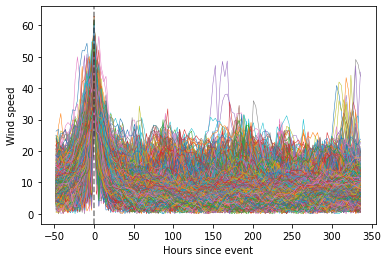

In [12]:
if do_forcing_tag:
    # Sanity check
    # We expect the max wind speed for each event at time = 0 (i.e., center of the event)
    plt.figure()
    plt.plot(time_plot_forcing[::3], wind_all, linewidth = 0.5)
    plt.axvline(x = 0, color = 'k', linestyle = '--', alpha = 0.5)
    plt.xlabel('Hours since event')
    plt.ylabel('Wind speed')

### Variables

In [13]:
# List all files across basins
folder_tags = ['NorthAtlantic', 'EPacific', 'WPacific_1of3', 'WPacific_2of3', 'WPacific_3of3', 'SWPacific_1of2', 'SWPacific_2of2', 'Indian']
# folder_tags = ['SWPacific_1of2', 'SWPacific_2of2', 'EPacific', 'WPacific_3of3']
# folder_tags = ['EPacific']
HYCOM_dir = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/6_HYCOM_near_TC_53x_pkl_NEW_BOX_postproc_/'
files = []

for i in np.arange(len(folder_tags)):

    HYCOM_dir_current = HYCOM_dir.replace('postproc_', 'postproc_' + str(folder_tags[i])) 
    files_in_dir = [j for j in sorted(glob.glob(HYCOM_dir_current + '*MLD.pkl'))]
    files = files + files_in_dir


In [14]:
# List all the regions

# lat_max, lat_min, lon_max, lon_min for every region
# regions = set_regions()
# regions_tags = set_regions_tags(regions)
# print(regions_tags)

In [15]:
# Load first to initialize variables that will store them all
new_dict = pkl.load(open(files[1], "rb"))

# Absolute values
temperature_abs_all = np.zeros((len_time,new_dict.temperature_abs.shape[1],len(files)))
salinity_abs_all = np.zeros((len_time,new_dict.salinity_abs.shape[1],len(files)))
density_abs_all = np.zeros((len_time,new_dict.density_abs.shape[1],len(files)))
salinityMLD_abs = np.zeros((len_time,len(files)))
densityMLD_abs = np.zeros((len_time,len(files)))
latitudes_2d_map = np.zeros(len(files))
longitudes_2d_map = np.zeros(len(files))

# Anomalies
temperature_anom_all = np.zeros((len_time,new_dict.temperature_anom.shape[1],len(files)))
salinity_anom_all = np.zeros((len_time,new_dict.salinity_anom.shape[1],len(files)))
density_anom_all = np.zeros((len_time,new_dict.density_anom.shape[1],len(files)))

# Variations from day -2, absolute values    
temperature_abs_minus2_all = np.zeros((len_time,new_dict.temperature_abs_minus2.shape[1],len(files)))
salinity_abs_minus2_all = np.zeros((len_time,new_dict.salinity_abs_minus2.shape[1],len(files)))
density_abs_minus2_all = np.zeros((len_time,new_dict.density_abs_minus2.shape[1],len(files)))

# Variations from day -2, anomalies
salinity_anom_minus2_all = np.zeros((len_time,new_dict.salinity_anom_minus2.shape[1],len(files)))
temperature_anom_minus2_all = np.zeros((len_time,new_dict.temperature_anom_minus2.shape[1],len(files)))
density_anom_minus2_all = np.zeros((len_time,new_dict.density_anom_minus2.shape[1],len(files)))
    
integral_precip_all = np.zeros(len(files))

longitude_holte = np.zeros(len(files))
latitude_holte = np.zeros(len(files))

# Loop across events and store variables
value_at_0_ind = []
file_name_all = []

for i in np.arange(len(files)):
    
    print('i', i)
    # Open file
    new_dict_original = pkl.load(open(files[i], "rb"))
    ind_fix = find_timedelta64_index(np_array_timedelta64 = new_dict_original.time.values[1:]-new_dict_original.time.values[0:-1],\
                      np_timedelta64_sel_ns = np.timedelta64(0, 'ns') # nanoseconds
                                )[0]+1
    if len(ind_fix) > 0:
        for ifix in ind_fix:
            new_dict_original.delta_time_approx.values[ifix] = np.timedelta64(1, 'ns')
            
    ind = find_timedelta64_index(np_array_timedelta64 = new_dict_original.delta_time_approx.values,\
                      np_timedelta64_sel_ns = np.timedelta64(0, 'ns') # nanoseconds
                      )[0] 
    if len(ind)>1:
        ciao
    
    new_dict = new_dict_original.isel(time=np.arange(ind-timesteps_before,ind+timesteps_after+1,1))
    
    ind_test = find_timedelta64_index(np_array_timedelta64 = new_dict.delta_time_approx.values,\
                      np_timedelta64_sel_ns = np.timedelta64(0, 'ns') # nanoseconds
                      )[0]
    value_at_0_ind.append(ind_test)
    
    # Store variables 
    # note: some events have 113 rows and not 112
    # This is because the selection of HYCOM data to keep was +- 7 days from the event center (datetime from forcing)
    # Forcing had data points every hour, while HYCOM every 3 hours
    # So in some case 1 extra row was kept (when the datetime from forcing was one of the 3-hour periods with HYCOM data)

    # Absolute values
    temperature_abs_all[:,:,i] = new_dict.temperature_abs.values[0:len_time,:]
    salinity_abs_all[:,:,i] = new_dict.salinity_abs.values[0:len_time,:]
    density_abs_all[:,:,i] = new_dict.density_abs.values[0:len_time,:]
    salinityMLD_abs[:,i] = new_dict.salinityMLD_abs.values[0:len_time]
    densityMLD_abs[:,i] = new_dict.densityMLD_abs.values[0:len_time]

    # Anomalies
    temperature_anom_all[:,:,i] = new_dict.temperature_anom.values[0:len_time,:]
    salinity_anom_all[:,:,i] = new_dict.salinity_anom.values[0:len_time,:]
    density_anom_all[:,:,i] = new_dict.density_anom.values[0:len_time,:]

    # Variations from day -2, absolute values    
    temperature_abs_minus2_all[:,:,i] = new_dict.temperature_abs_minus2.values[0:len_time,:]
    salinity_abs_minus2_all[:,:,i] = new_dict.salinity_abs_minus2.values[0:len_time,:]
    density_abs_minus2_all[:,:,i] = new_dict.density_abs_minus2.values[0:len_time,:]

    # Variations from day -2, anomalies
    salinity_anom_minus2_all[:,:,i] = new_dict.salinity_anom_minus2.values[0:len_time,:]
    temperature_anom_minus2_all[:,:,i] = new_dict.temperature_anom_minus2.values[0:len_time,:]
    density_anom_minus2_all[:,:,i] = new_dict.density_anom_minus2.values[0:len_time,:]
                    
    longitude_holte[i] = new_dict.longitude
    latitude_holte[i] = new_dict.latitude
    
    latitudes_2d_map[i] = new_dict.latitude
    longitudes_2d_map[i] = new_dict.longitude
    
    integral_precip_all[i] = new_dict.integral_precip
    
    # list of files names
    file_name_all.append(files[i])
    
if np.min(value_at_0_ind) != np.max(value_at_0_ind):
    print('error')
    ciao

# Calculate average across all events    
# temperature_abs_mean_all = np.nanmean(temperature_abs_all, axis = 2)
# salinity_abs_mean_all = np.nanmean(salinity_abs_all, axis = 2)
# temperature_anom_mean_all = np.nanmean(temperature_anom_all, axis = 2)
# salinity_anom_mean_all = np.nanmean(salinity_anom_all, axis = 2)
# temperature_abs_minus2_mean_all = np.nanmean(temperature_abs_minus2_all, axis = 2)
# salinity_abs_minus2_mean_all = np.nanmean(salinity_abs_minus2_all, axis = 2)

# Find depth where profile is increasing vs decreasing
dz_increasing = np.zeros(salinity_abs_all.shape[2])
dz_decreasing = np.zeros(salinity_abs_all.shape[2])
dz_dsame = np.zeros(salinity_abs_all.shape[2])
# dz = np.array([2,2,2,2,2,2.5,4,5,5,5,5,5,5,7.5,10,10,10,10,17.5,25,37.5,50,50,50,50,75,50]) # spessore per ogni livello di pressione
depth_np_array = new_dict.depth.to_numpy()
depth_np_array_sel = depth_np_array[0:max_depth_index_sel]
dz_sel = depth_np_array_sel[1:]-depth_np_array_sel[0:-1]
for i in np.arange(0,salinity_abs_all.shape[2]):
    dz_increasing[i] = sum(dz_sel[(salinity_abs_all[0,1:max_depth_index_sel,i]-salinity_abs_all[0,0,i])>0])
    dz_decreasing[i] = sum(dz_sel[(salinity_abs_all[0,1:max_depth_index_sel,i]-salinity_abs_all[0,0,i])<0])
    dz_dsame[i] = sum(dz_sel[(salinity_abs_all[0,1:max_depth_index_sel,i]-salinity_abs_all[0,0,i])==0])
    if dz_increasing[i]+dz_decreasing[i]+dz_dsame[i] != sum(dz_sel):
        print('NaN at ' + file_name_all[i])
        
#     dz_increasing[i] = sum(dz[(salinity_abs_all[0,1:,i]-salinity_abs_all[0,0,i])>0])
#     dz_decreasing[i] = sum(dz[(salinity_abs_all[0,1:,i]-salinity_abs_all[0,0,i])<0])
#     dz_dsame[i] = sum(dz[(salinity_abs_all[0,1:,i]-salinity_abs_all[0,0,i])==0])


i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
i 85
i 86
i 87
i 88
i 89
i 90
i 91
i 92
i 93
i 94
i 95
i 96
i 97
i 98
i 99
i 100
i 101
i 102
i 103
i 104
i 105
i 106
i 107
i 108
i 109
i 110
i 111
i 112
i 113
i 114
i 115
i 116
i 117
i 118
i 119
i 120
i 121
i 122
i 123
i 124
i 125
i 126
i 127
i 128
i 129
i 130
i 131
i 132
i 133
i 134
i 135
i 136
i 137
i 138
i 139
i 140
i 141
i 142
i 143
i 144
i 145
i 146
i 147
i 148
i 149
i 150
i 151
i 152
i 153
i 154
i 155
i 156
i 157
i 158
i 159
i 160
i 161
i 162
i 163
i 164
i 165
i 166
i 167
i 168
i 169
i 170
i 171
i 172
i 173
i 174
i 175
i 176
i 177
i 178
i 179
i 180
i 181
i 182
i 183
i 184


In [11]:
# Save variables to run Holte's code for MLD - Donata
if flag_save_to_Holte_matlab_code:
    
#     variables = ['temperature_abs_all', 'salinity_abs_all', 'density_abs_all', 'salinityMLD_abs', 'densityMLD_abs', 'latitude_holte', 'longitude_holte']
    variables = ['temperature_abs_all', 'salinity_abs_all', 'density_abs_all', \
                 'temperature_anom_minus2_all', 'salinity_anom_minus2_all', 'density_anom_minus2_all', \
                 'latitude_holte', 'longitude_holte']
    variables_units = ['°C', 'psu', 'kg/m$^3$', 'm', 'm', '-', '-']
    nc_path_all = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/T_S_D_ML_all_events/'

    for ivar, ivar_units in zip(variables, variables_units):
        if len(eval(ivar).shape) == 3:
            da = save_3dvars_as_nc4(np_arr_3d = eval(ivar), ax1 = time_plot, ax2 = depth_np_array, \
                             ax3 = np.arange(0, temperature_abs_all.shape[2], 1), \
                             np_arr_3d_tag = ivar, np_arr_3d_units = ivar_units, nc_path = nc_path_all)

        elif len(eval(ivar).shape) == 2:
            da = save_2dvars_as_nc4(np_arr_2d = eval(ivar), ax1 = time_plot, ax2 = np.arange(0, temperature_abs_all.shape[2], 1), \
                             np_arr_2d_tag = ivar, np_arr_2d_units = ivar_units, nc_path = nc_path_all)

        else: 
            da = save_1dvars_as_nc4(np_arr_1d = eval(ivar), ax1 = np.arange(0, temperature_abs_all.shape[2], 1), \
                             np_arr_1d_tag = ivar, nc_path = nc_path_all)


    prova = xr.open_dataset(nc_path_all + 'latitude_holte.nc4')
#     ML_holte = scipy.loadmat('/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/T_S_D_ML_all_events/ml_holte_all.mat')
 
    

In [ ]:
# # Load masks provided by Donata - OLD MASK
# donata_mask = scipy.loadmat('/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/T_S_D_ML_all_events/msk_diff_from_densMLsal_01.mat')

# donata_mask_incr = np.ravel(donata_mask['msk_diff_from_densMLsal_01_incr'].astype(bool))
# donata_mask_decr = np.ravel(donata_mask['msk_diff_from_densMLsal_01_decr'].astype(bool))


In [16]:
# Load masks provided by Donata - NEW MASK - USE THIS ONE
# donata_mask = scipy.loadmat('/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/T_S_D_ML_all_events/msk_diff_from_densMLsal_01_new04Jan.mat')
donata_mask = scipy.loadmat('/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/T_S_D_ML_all_events/msk_diff_from_densMLsal_NEW_with_dz050m_belowML.mat')

donata_mask_incr = np.ravel(donata_mask['msk_diff_from_densMLsal_NEW_incr'].astype(bool))
donata_mask_decr = np.ravel(donata_mask['msk_diff_from_densMLsal_NEW_decr'].astype(bool))


In [15]:
# Calculate salinity above/below MLD calculated using salinity
bfr = below_above_MLD(MLD_abs = salinityMLD_abs, var_abs = salinity_abs_all, len_time = len_time, \
                      len_files = len(files), depth_np_array = depth_np_array, time_plot = time_plot, \
                      days_from_event_center = days_from_event_center)
salinity_below_S_MLD = bfr[0]
salinity_above_S_MLD = bfr[1]

# Calculate salinity above/below MLD calculated using density
bfr = below_above_MLD(MLD_abs = densityMLD_abs, var_abs = salinity_abs_all, len_time = len_time, \
                      len_files = len(files), depth_np_array = depth_np_array, time_plot = time_plot, \
                      days_from_event_center = days_from_event_center)
salinity_below_D_MLD = bfr[0]
salinity_above_D_MLD = bfr[1]


/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/FUNCTIONS_HYCOM.py:193: RuntimeWarning: Mean of empty slice
  var_above_MLD = np.nanmean(bfr_var_temp_above_MLD, axis=2)[0]
/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/FUNCTIONS_HYCOM.py:197: RuntimeWarning: Mean of empty slice
  var_below_MLD = np.nanmean(bfr_var_temp_below_MLD, axis=2)[0]


In [16]:
# Condition for time_plot
if time_plot[np.min(value_at_0_ind)] != 0:
    print('error!!!')
    ciao

In [17]:
# Variables
data = ['temperature_abs_all', 'salinity_abs_all', 'density_abs_all', \
        'temperature_abs_minus2_all', 'salinity_abs_minus2_all', 'density_abs_minus2_all', \
        'temperature_anom_minus2_all', 'salinity_anom_minus2_all', 'density_anom_minus2_all']
#         'temperature_anom_all', 'salinity_anom_all', 'density_anom_all',\
#        'tempMLD', 'salinityMLD', 'density_MLD']

# Cases for selection
data_mask = ['donata_mask_incr',
             'donata_mask_decr',
#              'salinity_above_S_MLD < salinity_below_S_MLD', \
#              'salinity_above_S_MLD > salinity_below_S_MLD', \
#              'salinity_above_D_MLD < salinity_below_D_MLD', \
#              'salinity_above_D_MLD > salinity_below_D_MLD', \
#              'dz_increasing > dz_decreasing', \
#              'dz_increasing < dz_decreasing', \
#              'integral_precip_all < np.nanmean(integral_precip_all)',\
#             'integral_precip_all > np.nanmean(integral_precip_all)', \
#             'np.logical_and(dz_increasing < dz_decreasing, integral_precip_all < 2*np.nanmean(integral_precip_all))',\
#              'np.logical_and(dz_increasing > dz_decreasing, integral_precip_all < 2*np.nanmean(integral_precip_all))', \
#             'np.logical_and(dz_increasing < dz_decreasing, integral_precip_all > 2*np.nanmean(integral_precip_all))',\
#              'np.logical_and(dz_increasing > dz_decreasing, integral_precip_all > 2*np.nanmean(integral_precip_all))', \
#             'dz_increasing==dz_increasing',
#              'dz_decreasing/(dz_decreasing+dz_increasing+dz_dsame)>.75', \
#              'dz_increasing/(dz_decreasing+dz_increasing+dz_dsame)>.75', \
#              'np.logical_and(dz_increasing/(dz_decreasing+dz_increasing+dz_dsame)>.75, integral_precip_all > 2*np.nanmean(integral_precip_all))', \
#              'np.logical_and(dz_increasing/(dz_decreasing+dz_increasing+dz_dsame)>.75, integral_precip_all < 2*np.nanmean(integral_precip_all))',
            ]


In [18]:
# Save variables from the list "data" to be sent to Donata - for checking the differences among our plots - Apr 8
# scipy.savemat("temperature_abs_all.mat", {'data': temperature_abs_all})
# scipy.savemat("salinity_abs_all.mat", {'data': salinity_abs_all})
# scipy.savemat("density_abs_all.mat", {'data': density_abs_all})
# scipy.savemat("temperature_abs_minus2_all.mat", {'data': temperature_abs_minus2_all})
# scipy.savemat("salinity_abs_minus2_all.mat", {'data': salinity_abs_minus2_all})
# scipy.savemat("density_abs_minus2_all.mat", {'data': salinity_abs_minus2_all})
# scipy.savemat("time.mat", {'data': time_plot})
# scipy.savemat("longitude.mat", {'data': longitude_holte})
# scipy.savemat("latitude.mat", {'data': latitude_holte})
# depth = new_dict.depth
# scipy.savemat("depth.mat", {'data': depth})
# scipy.savemat("temperature_anom_minus2_all.mat", {'data': temperature_anom_minus2_all})
# scipy.savemat("salinity_anom_minus2_all.mat", {'data': salinity_anom_minus2_all})
# scipy.savemat("density_anom_minus2_all.mat", {'data': density_anom_minus2_all})
# scipy.savemat("wind_all.mat", {'data': wind_all})
# scipy.savemat("precipitation_all.mat", {'data': precipitation_all})
# scipy.savemat("time_forcing.mat", {'data': time_plot_forcing[::3]})

# prova = scipy.loadmat('precipitation_all.mat')


In [18]:
# Compute composites
for idata in data:
    for imask in data_mask:
        bfr_d = eval(idata)
        print(idata)
        bfr_mask = eval(imask)
        print(imask)
        print('+++++++++++++++++++++++++++++++++')
        # Function that creates composites
        ciao
        bfr = create_composite(bfr_d, bfr_mask, longitudes_2d_map, latitudes_2d_map)
        if idata == 'salinity_abs_all':
            # Calculate differences between each layer and the previous layer
            bfr_d_diff_layers = bfr_d[time_plot==days_from_event_center, 1::, bfr_mask] - \
                                bfr_d[time_plot==days_from_event_center, 0:-1, bfr_mask]
            # Calculate differences between each layer and the first layer
            bfr_d_diff_vs_top = bfr_d[time_plot==days_from_event_center, 1::, bfr_mask] - \
                                np.matlib.repmat(bfr_d[time_plot==days_from_event_center, 0, bfr_mask], \
                                bfr_d[time_plot==days_from_event_center, 1::, bfr_mask].shape[1], 1).transpose()
            
#             # Diagnostic simple plots with pcolor - difference between each layer and the previous layer
#             plot_simple_pcolor(data_to_plot = bfr_d_diff_layers.transpose(), data_vmin = -.5, data_vmax = .5, \
#                    data_cmap = 'RdBu_r', data_title = name_composite(idata, imask) + ' (diff_layers)', \
#                                y_hline1 = 20, y_hline2 = 23)
#             # Diagnostic simple plots with pcolor - difference between each layer and the first layer
#             plot_simple_pcolor(data_to_plot = bfr_d_diff_vs_top.transpose(), data_vmin = -.5, data_vmax = .5, \
#                    data_cmap = 'RdBu_r', data_title = name_composite(idata, imask) + ' (diff_vs_top)', \
#                                y_hline1 = 20, y_hline2 = 23)

        print('---------------------------------')
        exec(name_composite(idata, imask) + '_filename = [file_name_all[i] for i in np.arange(len(file_name_all)) if bfr_mask[i]]')        
        exec(name_composite(idata, imask) + ' = bfr[0]')
        exec(name_composite(idata, imask) + '_std = bfr[1]')
        exec(name_composite(idata, imask) + '_std_error = bfr[2]')
        exec(name_composite(idata, imask) + '_num_composite = bfr[3]')
        exec(name_composite(idata, imask) + '_profiles = bfr[4]') # profiles that could be saved as .pkl for GOTM 1D model
        exec(name_composite(idata, imask) + '_long = bfr[5]') 
        exec(name_composite(idata, imask) + '_lat = bfr[6]')
                
        

temperature_abs_all
donata_mask_incr
+++++++++++++++++++++++++++++++++


NameError: name 'ciao' is not defined

In [20]:
bfr_d.shape

(129, 28, 1238)

In [20]:
# Variables list for plots
var_list = ['salinity', 'temperature', 'density']
# var_list = ['temperature']

# Type list for plots
# type_list = ['abs_minus2']
type_list = ['anom_minus2']
# type_list = ['abs_minus2', 'anom', 'abs']

# Cases list for plots
case_list = ['donata_mask_incr', 'donata_mask_decr']#, \
#              'mean_75p_incr', 'mean_75p_decr']
#              'mean_incr', 'mean_decr', \
#              'mean_S_MLD_incr', 'mean_D_MLD_incr', 'mean_S_MLD_decr', 'mean_D_MLD_decr', \
#              'mean_little_rain_incr', 'mean_lot_rain_incr', \
#              'mean_decr_little_rain', 'mean_decr_lot_rain', \
             #'mean_little_rain_75p_incr', 'mean_lot_rain_75p_incr']

# Hatch list for plots - standard deviation or standard error
# type_hatch_list = ['_std_error', '_std'] 
type_hatch_list = ['_std_error']

units_list = ['Salinity change (psu)', 'Temperature change (°C)', 'Pot. density change (kg/m$^3$)']
# units_list = ['Temperature change (°C)']

max number per bin: 7.0
total number: 922.0


NameError: name 'ciao' is not defined

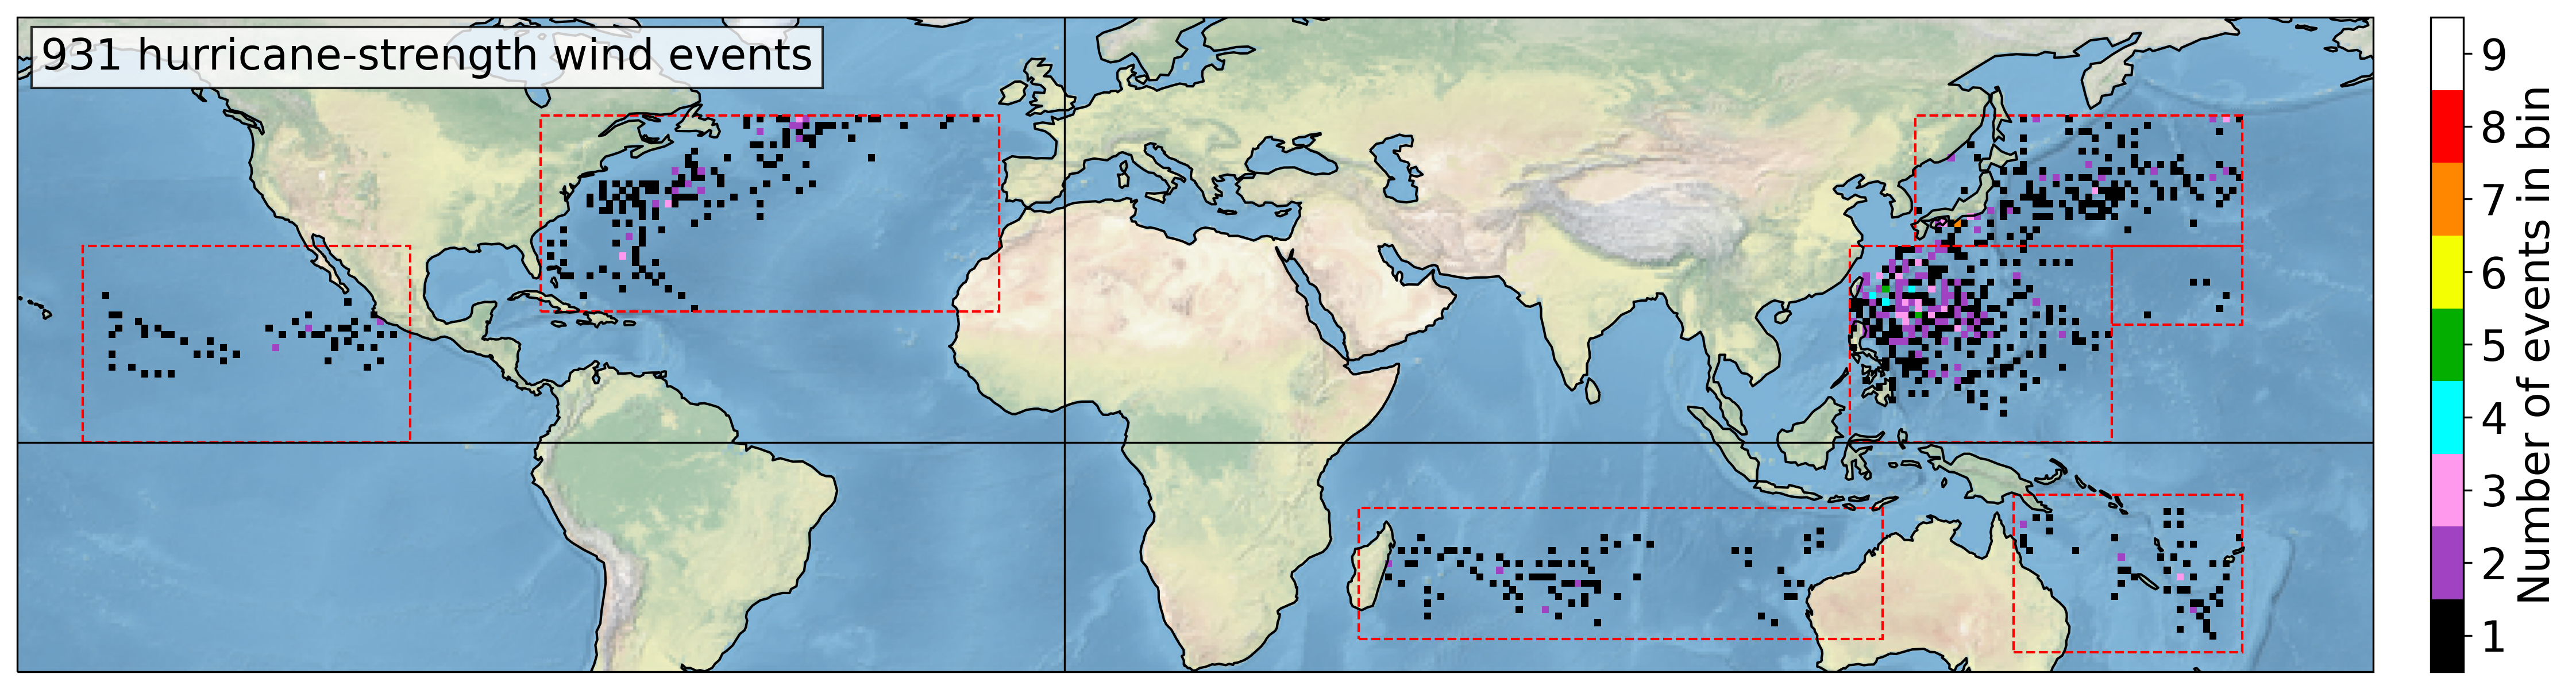

In [21]:
# Make composite plots and 2D maps
for icase in case_list: # masks
    # Make 2D map - need to only create one for each mask type
    function_map_2D_hist(eval(var_list[0] + '_' + type_list[0] + '_' + icase + '_long'), eval(var_list[0] + '_' + type_list[0] + '_' + icase + '_lat'), icase, offset_lon)
    for ihatch in type_hatch_list: # stdev, std error
        if ihatch == '_std_error':
            ihatch_factor = 1.96
            ihatch_factor_tag = ' (95% confidence limit)'
        else:
            ihatch_factor = 1 # change to 2 in the future
            ihatch_factor_tag = ''
            
        for itype in type_list: # abs, abs_minus2, anom
                i = 0
                for ivar in np.arange(0,len(var_list),1): # variables
                    iunit = units_list[i]
                    i = i + 1
                    num = globals()[var_list[ivar] + '_' + itype + '_' + icase + '_num_composite']
                    # Make composite plot
                    function_plots(data = globals()[var_list[ivar] + '_' + itype + '_' + icase], \
                                   data_ihatch = ihatch_factor*globals()[var_list[ivar] + '_' + itype + '_' + icase + ihatch], \
                                   data_tag = var_list[ivar] + '_' + itype + '_' + icase + '_mnn' + str(np.min(num)) + '_mxn' + str(np.max(num)), \
                                   ihatch_tag = ihatch, \
                                   ihatch_tag_confidence_limit = ihatch_factor_tag, \
                                   data_xaxis = time_plot,\
                                   data_yaxis = new_dict.depth.values,\
                                   data_yaxis_lim = [0, 150], \
                                   data_vmin = set_clim_plots(var_list[ivar], itype)[0], \
                                   data_vmax = set_clim_plots(var_list[ivar], itype)[1], \
                                   std_vmin = set_clim_plots_std(var_list[ivar], itype, ihatch)[0], \
                                   std_vmax = set_clim_plots_std(var_list[ivar], itype, ihatch)[1], \
                                   cmap = set_cmap(itype)) 
                    
                    # SINGLE PANEL plots
                    function_single_panels_plots(data = globals()[var_list[ivar] + '_' + itype + '_' + icase], \
                                   data_ihatch = ihatch_factor*globals()[var_list[ivar] + '_' + itype + '_' + icase + ihatch], \
                                   data_tag = var_list[ivar] + '_' + itype + '_' + icase + '_mnn' + str(np.min(num)) + '_mxn' + str(np.max(num)), \
                                   ihatch_tag = ihatch, \
                                   ihatch_tag_confidence_limit = ihatch_factor_tag, \
                                   data_xaxis = time_plot,\
                                   data_yaxis = new_dict.depth.values,\
                                   data_yaxis_lim = [0, 150], \
                                   data_vmin = set_clim_plots(var_list[ivar], itype)[0], \
                                   data_vmax = set_clim_plots(var_list[ivar], itype)[1], \
                                   std_vmin = set_clim_plots_std(var_list[ivar], itype, ihatch)[0], \
                                   std_vmax = set_clim_plots_std(var_list[ivar], itype, ihatch)[1], \
                                   cmap = set_cmap(itype),
                                   units = iunit)
                           

In [ ]:
# scipy.savemat("density_anom_minus2_donata_mask_decr_std_error.mat", {'density_anom_minus2_donata_mask_decr_std_error': density_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("density_anom_minus2_donata_mask_incr_std_error.mat", {'density_anom_minus2_donata_mask_incr_std_error': density_anom_minus2_donata_mask_incr_std_error})
# scipy.savemat("salinity_anom_minus2_donata_mask_decr_std_error.mat", {'salinity_anom_minus2_donata_mask_decr_std_error': salinity_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("salinity_anom_minus2_donata_mask_incr_std_error.mat", {'salinity_anom_minus2_donata_mask_incr_std_error': salinity_anom_minus2_donata_mask_incr_std_error})
# scipy.savemat("temperature_anom_minus2_donata_mask_decr_std_error.mat", {'temperature_anom_minus2_donata_mask_decr_std_error': temperature_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("temperature_anom_minus2_donata_mask_incr_std_error.mat", {'temperature_anom_minus2_donata_mask_incr_std_error': temperature_anom_minus2_donata_mask_incr_std_error})

# density_diff_anom_minus2_donata_mask_decr_std_error = np.sqrt(np.square(density_anom_minus2_donata_mask_incr_std_error) + \
#                                                             + np.square(density_anom_minus2_donata_mask_decr_std_error))
# salinity_diff_anom_minus2_donata_mask_decr_std_error = np.sqrt(np.square(salinity_anom_minus2_donata_mask_incr_std_error) + \
#                                                             + np.square(salinity_anom_minus2_donata_mask_decr_std_error))
# temperature_diff_anom_minus2_donata_mask_decr_std_error = np.sqrt(np.square(temperature_anom_minus2_donata_mask_incr_std_error) + \
#                                                             + np.square(temperature_anom_minus2_donata_mask_decr_std_error))

# scipy.savemat("density_diff_anom_minus2_donata_mask_decr_std_error.mat", {'density_diff_anom_minus2_donata_mask_decr_std_error': density_diff_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("salinity_diff_anom_minus2_donata_mask_decr_std_error.mat", {'salinity_diff_anom_minus2_donata_mask_decr_std_error': salinity_diff_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("temperature_diff_anom_minus2_donata_mask_decr_std_error.mat", {'temperature_diff_anom_minus2_donata_mask_decr_std_error': temperature_diff_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("density_anom_minus2_donata_mask_decr_std_error.mat", {'density_anom_minus2_donata_mask_decr_std_error': density_anom_minus2_donata_mask_decr_std_error})
# scipy.savemat("density_anom_minus2_donata_mask_incr_std_error.mat", {'density_anom_minus2_donata_mask_decr_std_error': density_anom_minus2_donata_mask_decr_std_error})



In [ ]:
# Calculate differences (incr - decr) and make SINGLE PANEL plots

var_list = ['salinity', 'temperature', 'density']
# type_list = ['abs_minus2']
type_list = ['anom_minus2']
mask_list = ['donata_mask']#, 'mean_75p']
type_hatch_list = ['_std_error']#, '_std']
units_list = ['Salinity change (psu)', 'Temperature change (°C)', 'Pot. density change (kg/m$^3$)']

i = 0
for ivar in var_list:
    iunit = units_list[i]
    i = i + 1
    for itype in type_list:
        for imask in mask_list:
            for ihatch in type_hatch_list: # std, std error
                if ihatch == '_std_error':
                    ihatch_factor = 1.96
                    ihatch_factor_tag = ' (95% confidence limit)'
                else:
                    ihatch_factor = 1 # change to 2 in the future
                    ihatch_factor_tag = ''   

                # Increasing vs decreasing for this mask and variable
                bfr_d_incr = eval(ivar + '_' + itype + '_' + imask + '_incr')
                bfr_d_decr = eval(ivar + '_' + itype + '_' + imask + '_decr')
                bfr_d_incr_ihatch = eval(ivar + '_' + itype + '_' + imask + '_incr' + ihatch)
                bfr_d_decr_ihatch = eval(ivar + '_' + itype + '_' + imask + '_decr' + ihatch)

                # Calculate differences
                bfr_d_diff = bfr_d_incr - bfr_d_decr
                # Calculate std error of the differences
                bfr_d_diff_ihatch = np.sqrt(np.square(bfr_d_incr_ihatch) + np.square(bfr_d_decr_ihatch))
#                 bfr_d_diff_ihatch = bfr_d_incr_ihatch + bfr_d_decr_ihatch
                
                # Make difference plot
                function_single_panels_plots(data = bfr_d_diff, \
                               data_ihatch = ihatch_factor * bfr_d_diff_ihatch, \
                               data_tag = 'diff_' + ivar + '_' + itype + '_' + imask, \
                               ihatch_tag = ihatch, \
                               ihatch_tag_confidence_limit = ihatch_factor_tag, \
                               data_xaxis = time_plot,\
                               data_yaxis = new_dict.depth.values,\
                               data_yaxis_lim = [0, 150], \
                               data_vmin = set_clim_plots_diff(ivar, itype)[0], \
                               data_vmax = set_clim_plots_diff(ivar, itype)[1], \
                               std_vmin = set_clim_plots_std_diff(ivar, itype, ihatch)[0], \
                               std_vmax = set_clim_plots_std_diff(ivar, itype, ihatch)[1], \
                               cmap = set_cmap(itype),
                               units = iunit)
        

In [ ]:
# Calculate differences (incr - decr) and make plots

var_list = ['salinity', 'temperature', 'density']
# var_list = ['temperature']

type_list = ['abs_minus2']
# mask_list = ['donata_mask', 'mean_75p']
mask_list = ['donata_mask']

type_hatch_list = ['_std_error']#, '_std']

for ivar in var_list:
    for itype in type_list:
        for imask in mask_list:
            for ihatch in type_hatch_list: # std, std error
                if ihatch == '_std_error':
                    ihatch_factor = 1.96
                    ihatch_factor_tag = ' (95% confidence limit)'
                else:
                    ihatch_factor = 1 # change to 2 in the future
                    ihatch_factor_tag = ''   
            
                # Increasing vs decreasing for this mask and variable
                bfr_d_incr = eval(ivar + '_' + itype + '_' + imask + '_incr')
                bfr_d_decr = eval(ivar + '_' + itype + '_' + imask + '_decr')
                bfr_d_incr_ihatch = eval(ivar + '_' + itype + '_' + imask + '_incr' + ihatch)
                bfr_d_decr_ihatch = eval(ivar + '_' + itype + '_' + imask + '_decr' + ihatch)

                # Calculate differences
                bfr_d_diff = bfr_d_incr - bfr_d_decr
                # Calculate std error of the differences
                bfr_d_diff_ihatch = np.sqrt(np.square(bfr_d_incr_ihatch) + np.square(bfr_d_decr_ihatch))
#                 bfr_d_diff_ihatch = bfr_d_incr_ihatch + bfr_d_decr_ihatch
                
                # Make difference plot
                function_plots(data = bfr_d_diff, \
                               data_ihatch = ihatch_factor * bfr_d_diff_ihatch, \
                               data_tag = 'diff_' + ivar + '_' + itype + '_' + imask, \
                               ihatch_tag = ihatch, \
                               ihatch_tag_confidence_limit = ihatch_factor_tag, \
                               data_xaxis = time_plot,\
                               data_yaxis = new_dict.depth.values,\
                               data_yaxis_lim = [0, 150], \
                               data_vmin = set_clim_plots_diff(ivar, itype)[0], \
                               data_vmax = set_clim_plots_diff(ivar, itype)[1], \
                               std_vmin = set_clim_plots_std_diff(ivar, itype, ihatch)[0], \
                               std_vmax = set_clim_plots_std_diff(ivar, itype, ihatch)[1], \
                               cmap = set_cmap(itype))
        

In [ ]:
# data_masked = np.ma.masked_less(np.abs(bfr_d_diff), bfr_d_diff_ihatch) 

# plt.figure(figsize = (15,6))
# plt.pcolor(new_dict.time, new_dict.depth, bfr_d_diff.transpose(), vmin = -2, vmax = 2, cmap = cmap_bfr)
# plt.plot(T1d[data_mask_new.flatten()], D1d[data_mask_new.flatten()], '.k')
# plt.ylim(0, 150)
# plt.gca().invert_yaxis()
# # cmap_bfr = plt.get_cmap('RdBu_r', 6)
# plt.colorbar()


In [ ]:
CIAO

In [ ]:
type_list = ['abs_minus2', 'abs']


In [ ]:
# Move single events plots into composite folders
dir_events_composite = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/PLOTS_composite_NEW_BOX/SINGLE_events_COMPOSITE/'

data_select = ['temperature_abs_all', 'salinity_abs_all', 'density_abs_all', \
               'temperature_abs_minus2_all', 'salinity_abs_minus2_all', 'density_abs_minus2_all']
dir_single_events = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/PLOTS_single_events/'

for idata in data_select:
    for imask in data_mask:
        bfr_tag = name_composite(idata, imask)
        bfr_list = eval(bfr_tag + '_filename')
        for itype in type_list:
            os.mkdir(dir_events_composite + bfr_tag + '_' + itype + '/')
            
        for l in bfr_list:
            bfr = l.split('/')
            for itype in type_list:
                bfr_type = bfr[-1].replace('.pkl', '_' + itype + '.png')
                
                bfr_type_split = bfr_type.split('_')
                if 'WPacific' in bfr_type:
                    shutil.copyfile(dir_single_events + bfr_type_split[0] + '_' + bfr_type_split[1] + '/' + bfr_type, \
                        dir_events_composite + bfr_tag +  '_' + itype + '/' + bfr_type)
                else:
                    shutil.copyfile(dir_single_events + bfr_type_split[0] + '/' + bfr_type, \
                        dir_events_composite + bfr_tag +  '_' + itype + '/' + bfr_type)
                
                
                
                
                